In [4]:
import numpy as np
import pandas as pd
from small_text import LeastConfidence, PoolBasedActiveLearner, random_initialization_balanced as init
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from synergy_dataset import Dataset, iter_datasets

from small_text.classifiers.factories import SklearnClassifierFactory
from sklearn.naive_bayes import MultinomialNB
from small_text.data.datasets import SklearnDataset
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTEN

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = Dataset('Leenaars_2020')
dataset = dataset.to_frame()
# dataset = pd.read_csv('../datasets/synergy_dataset/Radjenovic_2013.csv')
dataset = dataset.dropna()

In [3]:
X = np.array(dataset['abstract'])
y = np.array(dataset['label_included'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
sampler = SMOTEN(random_state=42)
X_train_os, y_train_os = sampler.fit_resample(X_train.reshape(-1, 1), y_train)

###Com balanceamento

In [6]:
num_classes = 2

# clf = SklearnClassifier(MultinomialNB(), num_classes=2)

factory = SklearnClassifierFactory(MultinomialNB(), num_classes)
vectorizer = TfidfVectorizer()

train = SklearnDataset.from_arrays(X_train_os.flatten(), y_train_os, vectorizer, target_labels=np.array([0, 1]))
test = SklearnDataset.from_arrays(X_test.flatten(), y_test, vectorizer, target_labels=np.array([0, 1]), train=False)

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/utils/annotations.py:67: ExperimentalWarning: The function from_arrays is experimental and maybe subject to change soon.
  warnings.warn(f'The {subject} {func_or_class.__name__} is experimental '
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)


In [7]:
query_strategy = LeastConfidence()
active_learner = PoolBasedActiveLearner(factory, query_strategy, train)

indices_initial = init(train.y, n_samples=10)
active_learner.initialize_data(indices_initial, train.y[indices_initial])

In [8]:
num_queries = 10
results = []
indices_labeled = []

for i in range(num_queries):
    indices_queried = active_learner.query(num_samples=20)
    y = train.y[indices_queried]
    active_learner.update(y)

    indices_labeled = np.concatenate([indices_queried, indices_labeled])

    y_pred_train = active_learner.classifier.predict(train)
    y_pred_test = active_learner.classifier.predict(test)
    print(f'\nIteration {i+1} ({len(indices_labeled)} samples)')
    print('Train accuracy: {:.2f}'.format(accuracy_score(train.y, y_pred_train)))
    print('Train precision: {:.2f}'.format(precision_score(train.y, y_pred_train, zero_division=np.nan)))
    print('Train recall: {:.2f}'.format(recall_score(train.y, y_pred_train, zero_division=np.nan)))
    print('Train F1 score: {:.2f}'.format(f1_score(train.y, y_pred_train)))
    print('\n')
    print('Test accuracy: {:.2f}'.format(accuracy_score(test.y, y_pred_test)))
    print('Test precision: {:.2f}'.format(precision_score(test.y, y_pred_test, zero_division=np.nan)))
    print('Test recall: {:.2f}'.format(recall_score(test.y, y_pred_test, zero_division=np.nan)))
    print('Test F1 score: {:.2f}'.format(f1_score(test.y, y_pred_test)))

    results.append([accuracy_score(train.y, y_pred_train), accuracy_score(test.y, y_pred_test), f1_score(train.y, y_pred_train), f1_score(test.y, y_pred_test), f1_score(train.y, y_pred_train), f1_score(test.y, y_pred_test), recall_score(train.y, y_pred_train), recall_score(test.y, y_pred_test)])

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/dat


Iteration 1 (20 samples)
Train accuracy: 0.96
Train precision: 1.00
Train recall: 0.91
Train F1 score: 0.95


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 2 (40 samples)
Train accuracy: 0.57
Train precision: 0.54
Train recall: 1.00
Train F1 score: 0.70


Test accuracy: 0.21
Test precision: 0.09
Test recall: 0.98
Test F1 score: 0.17

Iteration 3 (60 samples)
Train accuracy: 0.96
Train precision: 1.00
Train recall: 0.91
Train F1 score: 0.95


Test accuracy: 0.91
Test precision: 0.31
Test recall: 0.03
Test F1 score: 0.05

Iteration 4 (80 samples)
Train accuracy: 0.96
Train precision: 1.00
Train recall: 0.91
Train F1 score: 0.95


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 5 (100 samples)
Train accuracy: 0.96
Train precision: 1.00
Train recall: 0.92
Train F1 score: 0.96


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 6 (120 samples)
Train accuracy: 0.96
Trai

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/dat

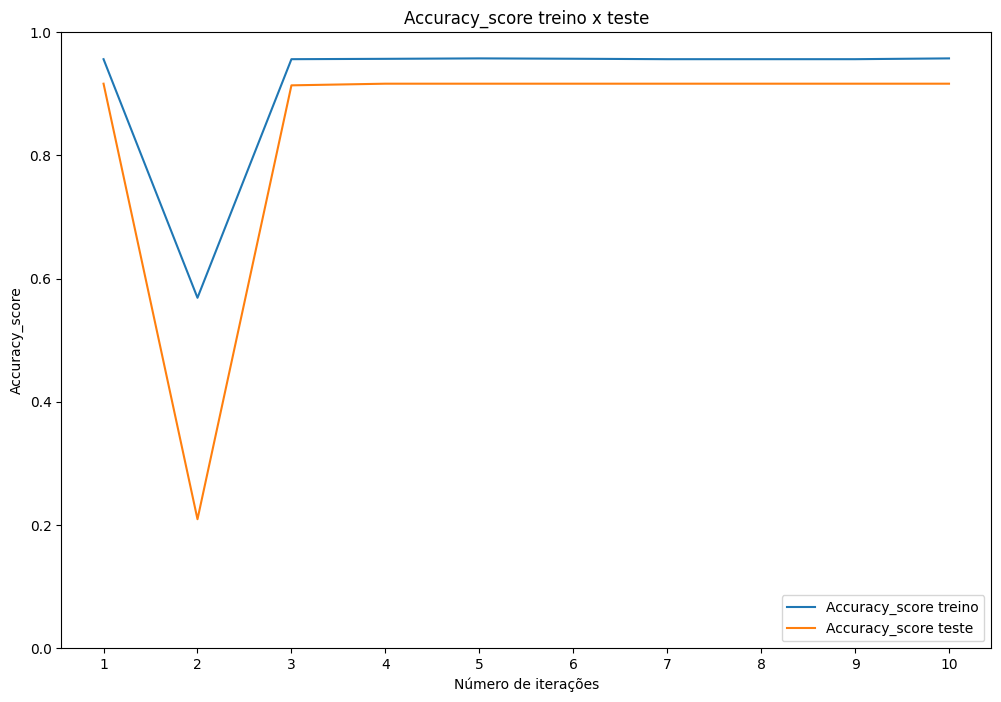

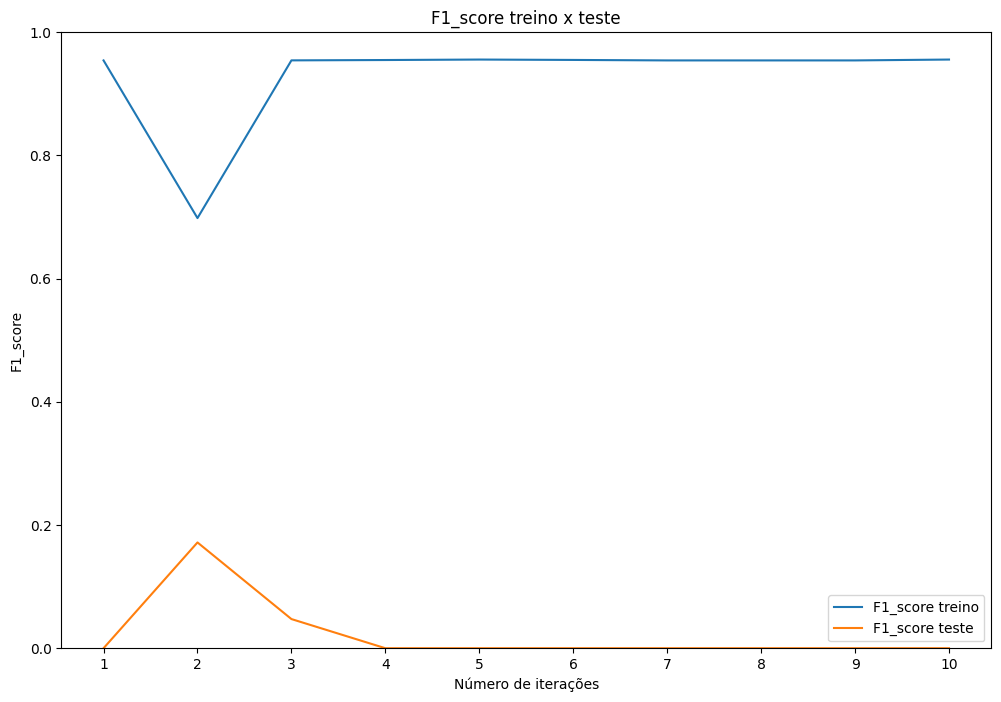

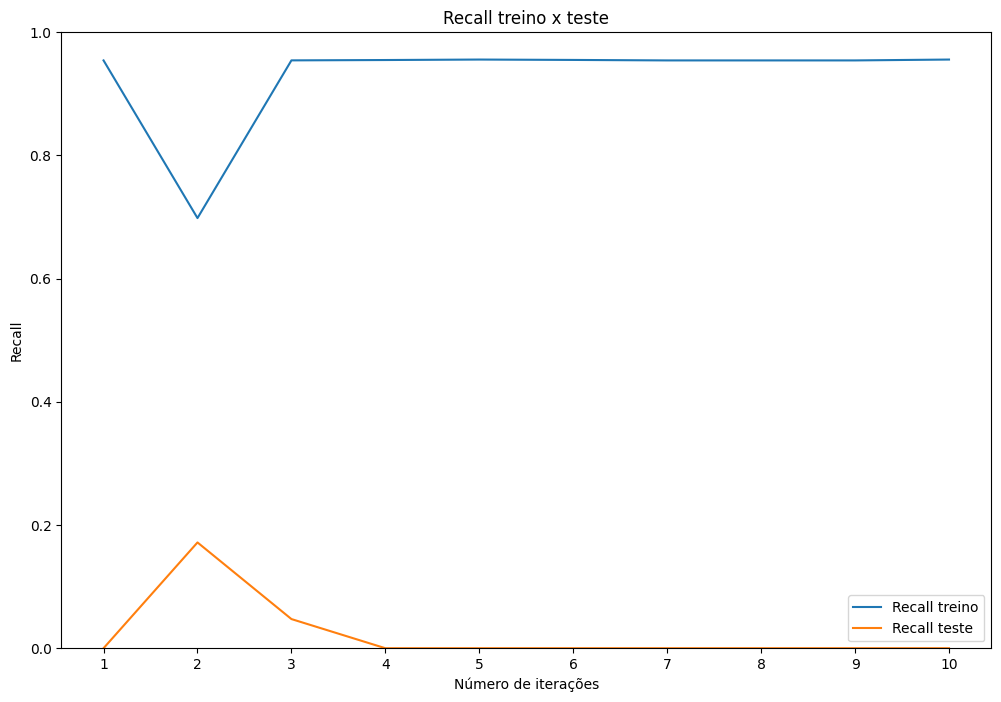

In [9]:
#Plotando resultados
acc_treino = []
acc_teste = []
f1_treino = []
f1_teste = []
recall_treino = []
recall_teste = []

def plota_resultados(treino, teste, metrica):
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()
    ax.plot(np.arange(1, len(treino)+1), treino, label=f'{metrica} treino')
    ax.plot(np.arange(1, len(treino)+1), teste, label=f'{metrica} teste')
    ax.legend(loc='lower right')
    plt.xticks(np.arange(1, len(treino)+1))
    plt.ylim((0.0, 1.0))
    plt.ylabel(metrica)
    plt.xlabel('Número de iterações')
    plt.title(f'{metrica} treino x teste')
    plt.savefig(f'{metrica}.png')


for result in results:
    acc_treino.append(result[0])
    acc_teste.append(result[1])
    f1_treino.append(result[2])
    f1_teste.append(result[3])
    recall_treino.append(result[4])
    recall_teste.append(result[5])

plota_resultados(acc_treino, acc_teste, 'Accuracy_score')
plota_resultados(f1_treino, f1_teste, 'F1_score')
plota_resultados(recall_treino, recall_teste, 'Recall')

###Sem balanceamento

In [10]:
num_classes = 2

# clf = SklearnClassifier(MultinomialNB(), num_classes=2)

factory = SklearnClassifierFactory(MultinomialNB(), num_classes)
vectorizer = TfidfVectorizer()

train = SklearnDataset.from_arrays(X_train.flatten(), y_train, vectorizer, target_labels=np.array([0, 1]))
test = SklearnDataset.from_arrays(X_test.flatten(), y_test, vectorizer, target_labels=np.array([0, 1]), train=False)

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/utils/annotations.py:67: ExperimentalWarning: The function from_arrays is experimental and maybe subject to change soon.
  warnings.warn(f'The {subject} {func_or_class.__name__} is experimental '
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)


In [11]:
query_strategy = LeastConfidence()
active_learner = PoolBasedActiveLearner(factory, query_strategy, train)

indices_initial = init(train.y, n_samples=10)
active_learner.initialize_data(indices_initial, train.y[indices_initial])

In [12]:
num_queries = 10
results = []
indices_labeled = []

for i in range(num_queries):
    indices_queried = active_learner.query(num_samples=20)
    y = train.y[indices_queried]
    active_learner.update(y)

    indices_labeled = np.concatenate([indices_queried, indices_labeled])

    y_pred_train = active_learner.classifier.predict(train)
    y_pred_test = active_learner.classifier.predict(test)
    print(f'\nIteration {i+1} ({len(indices_labeled)} samples)')
    print('Train accuracy: {:.2f}'.format(accuracy_score(train.y, y_pred_train)))
    print('Train precision: {:.2f}'.format(precision_score(train.y, y_pred_train, zero_division=np.nan)))
    print('Train recall: {:.2f}'.format(recall_score(train.y, y_pred_train, zero_division=np.nan)))
    print('Train F1 score: {:.2f}'.format(f1_score(train.y, y_pred_train)))
    print('\n')
    print('Test accuracy: {:.2f}'.format(accuracy_score(test.y, y_pred_test)))
    print('Test precision: {:.2f}'.format(precision_score(test.y, y_pred_test, zero_division=np.nan)))
    print('Test recall: {:.2f}'.format(recall_score(test.y, y_pred_test, zero_division=np.nan)))
    print('Test F1 score: {:.2f}'.format(f1_score(test.y, y_pred_test)))

    results.append([accuracy_score(train.y, y_pred_train), accuracy_score(test.y, y_pred_test), f1_score(train.y, y_pred_train), f1_score(test.y, y_pred_test), f1_score(train.y, y_pred_train), f1_score(test.y, y_pred_test), recall_score(train.y, y_pred_train), recall_score(test.y, y_pred_test)])

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/dat


Iteration 1 (20 samples)
Train accuracy: 0.92
Train precision: nan
Train recall: 0.00
Train F1 score: 0.00


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 2 (40 samples)
Train accuracy: 0.92
Train precision: nan
Train recall: 0.00
Train F1 score: 0.00


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 3 (60 samples)
Train accuracy: 0.92
Train precision: nan
Train recall: 0.00
Train F1 score: 0.00


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 4 (80 samples)
Train accuracy: 0.92
Train precision: nan
Train recall: 0.00
Train F1 score: 0.00


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 5 (100 samples)
Train accuracy: 0.92
Train precision: nan
Train recall: 0.00
Train F1 score: 0.00


Test accuracy: 0.92
Test precision: nan
Test recall: 0.00
Test F1 score: 0.00

Iteration 6 (120 samples)
Train accuracy: 0.92
Train preci

/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)
/home/junior/Mestrado Comp Ifes/Dissertação/small-text/.venv/lib/python3.8/site-packages/small_text/data/datasets.py:437: DeprecationWarning: The function get_flattened_unique_labels has been deprecated in 1.1.0 and will be removed in 2.0.0.
  encountered_labels = get_flattened_unique_labels(self)


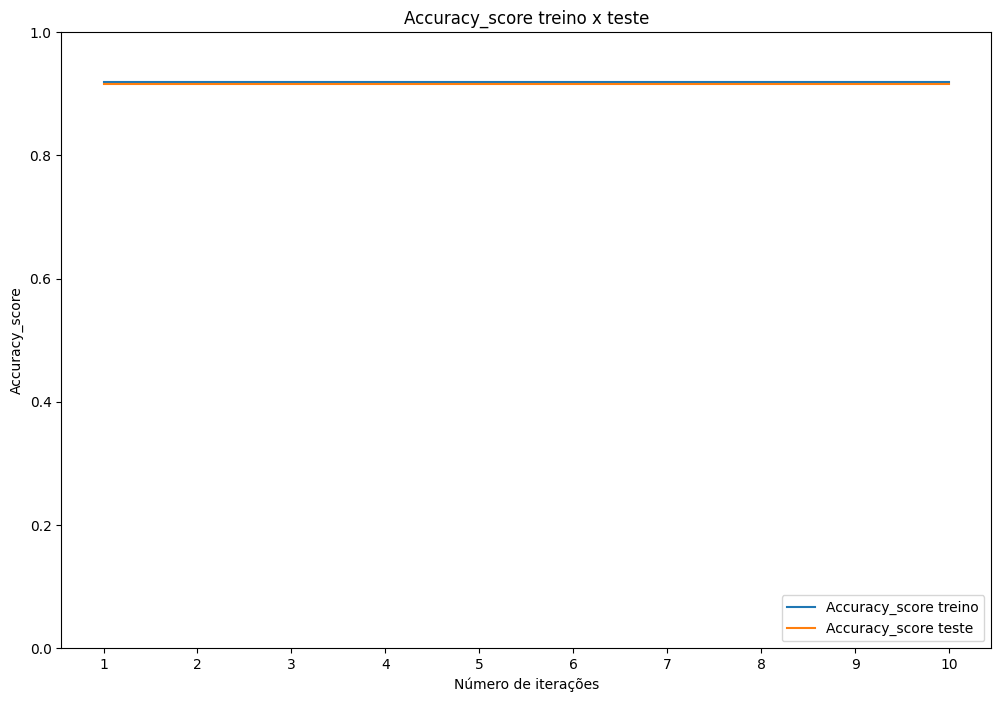

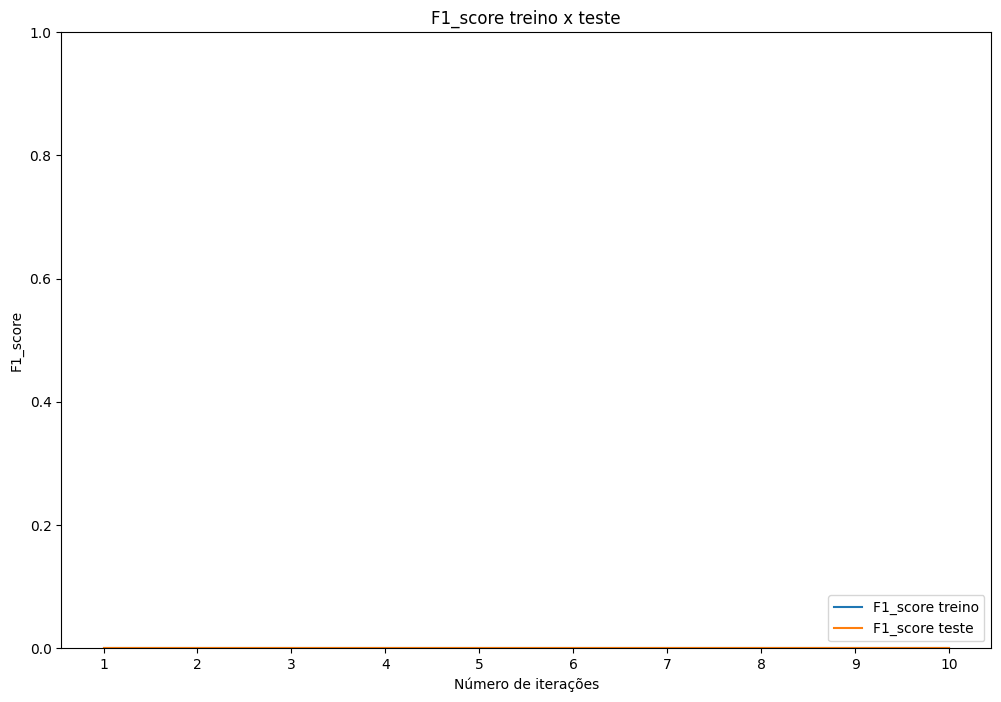

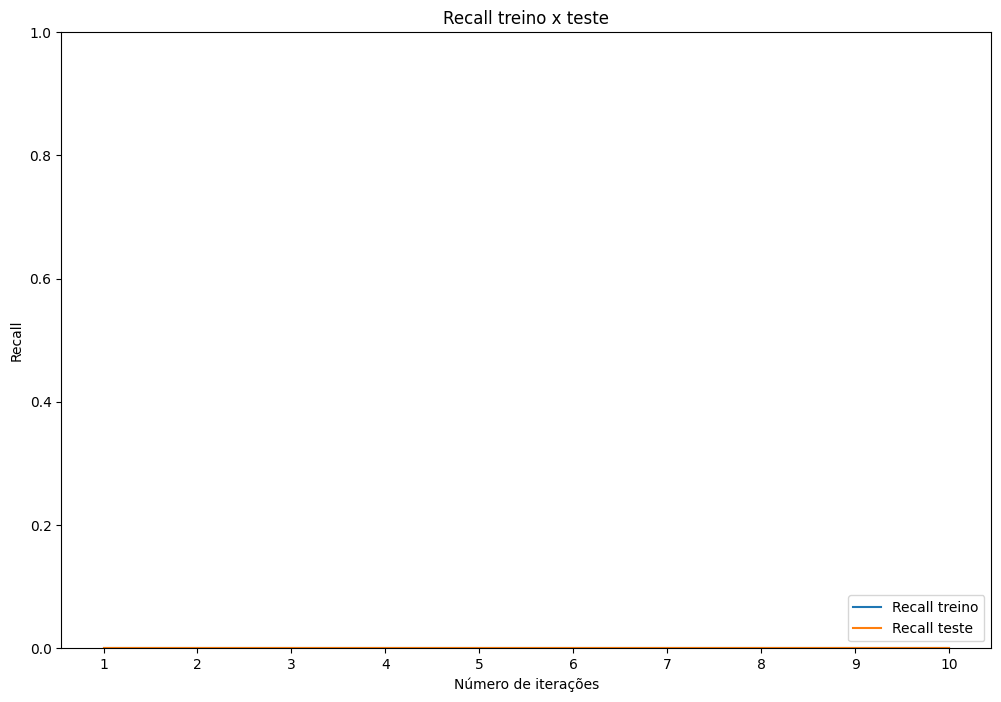

In [13]:
#Plotando resultados
acc_treino = []
acc_teste = []
f1_treino = []
f1_teste = []
recall_treino = []
recall_teste = []

def plota_resultados(treino, teste, metrica):
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()
    ax.plot(np.arange(1, len(treino)+1), treino, label=f'{metrica} treino')
    ax.plot(np.arange(1, len(treino)+1), teste, label=f'{metrica} teste')
    ax.legend(loc='lower right')
    plt.xticks(np.arange(1, len(treino)+1))
    plt.ylim((0.0, 1.0))
    plt.ylabel(metrica)
    plt.xlabel('Número de iterações')
    plt.title(f'{metrica} treino x teste')
    plt.savefig(f'{metrica}.png')


for result in results:
    acc_treino.append(result[0])
    acc_teste.append(result[1])
    f1_treino.append(result[2])
    f1_teste.append(result[3])
    recall_treino.append(result[4])
    recall_teste.append(result[5])

plota_resultados(acc_treino, acc_teste, 'Accuracy_score')
plota_resultados(f1_treino, f1_teste, 'F1_score')
plota_resultados(recall_treino, recall_teste, 'Recall')